In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [5]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SVMSMOTE
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import linear_model
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

dataset = pd.read_csv("../input/breast-cancer-dataset/breast-cancer.csv")

X = dataset.iloc[:,2:]
y = dataset.iloc[:,1]
y = pd.get_dummies(y)
y = y.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Print Training dataset size
print("Original Training Dataset Size:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print()


# Print Testing dataset size
print("Original Testing Dataset Size:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=500)
clf.fit(X_train, y_train)
train_score=clf.score(X_train, y_train)
test_score=clf.score(X_test, y_test)
print("train: ",train_score)
print("test: " , test_score)



Original Training Dataset Size:
X_train shape: (455, 30)
y_train shape: (455,)

Original Testing Dataset Size:
X_test shape: (114, 30)
y_test shape: (114,)
train:  1.0
test:  0.9824561403508771


Confusion matrix


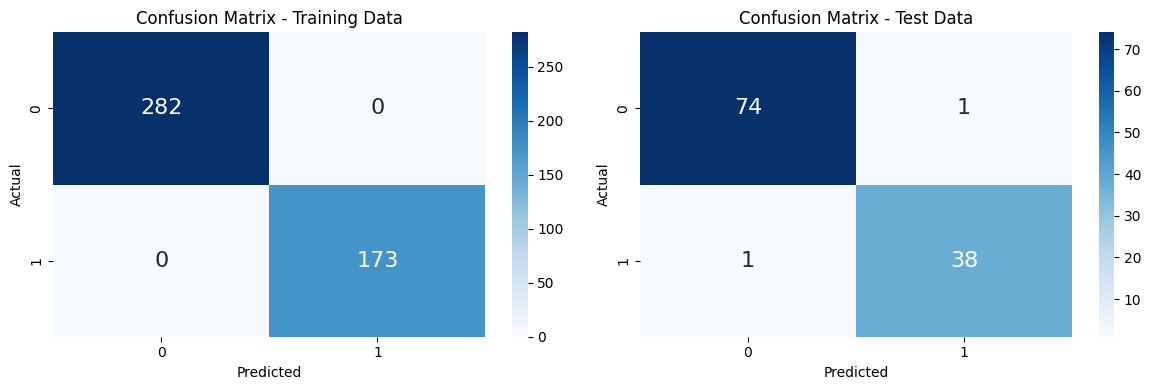

In [7]:
print("Confusion matrix")

# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
